# Generates Table of detection probabilities and key metrics for the CPP Targets Wiki

### Imports

In [1]:
# Autoreload extension
%load_ext autoreload
%autoreload 2

In [2]:
import os, numpy as np, pandas as pd
from astropy.time import Time
from astropy import units as u, constants as c
import matplotlib.pyplot as plt
from roman_pointing.roman_pointing import calcRomanAngles, getL2Positions
from astroquery.simbad import Simbad
from astropy.coordinates import (
    SkyCoord,
    Distance,
    BarycentricMeanEcliptic,
)
from roman_table import *

### Helper Functions

In [3]:
def get_GB_sunang(ts):
    # ts must be astropy.Time object
    simbad = Simbad()
    simbad.add_votable_fields("pmra", "pmdec", "plx_value", "rvz_radvel")
    res = simbad.query_object("Sagittarius A*")
    gb = SkyCoord(
        res["ra"].value.data[0],
        res["dec"].value.data[0],
        unit=(res["ra"].unit, res["dec"].unit),
        frame="icrs",
        distance=Distance(8 * u.kpc),
        pm_ra_cosdec=0 * res["pmra"].unit,
        pm_dec=0 * res["pmdec"].unit,
        radial_velocity=0 * res["rvz_radvel"].unit,
        equinox="J2000",
        obstime="J2000",
    ).transform_to(BarycentricMeanEcliptic)
    sun_ang_ref, _, _, _ = calcRomanAngles(
        gb, ts, getL2Positions(ts)
    )
    return sun_ang_ref

def get_targ_sunang(star,ts):
    # ts must be astropy.Time object
    simbad_name = " ".join(star.split("_"))
    simbad = Simbad()
    simbad.add_votable_fields("pmra", "pmdec", "plx_value", "rvz_radvel")
    res = simbad.query_object(simbad_name)
    target = SkyCoord(
        res["ra"].value.data[0],
        res["dec"].value.data[0],
        unit=(res["ra"].unit, res["dec"].unit),
        frame="icrs",
        distance=Distance(parallax=res["plx_value"].value.data[0] * res["plx_value"].unit),
        pm_ra_cosdec=res["pmra"].value.data[0] * res["pmra"].unit,
        pm_dec=res["pmdec"].value.data[0] * res["pmdec"].unit,
        radial_velocity=res["rvz_radvel"].value.data[0] * res["rvz_radvel"].unit,
        equinox="J2000",
        obstime="J2000",
    ).transform_to(BarycentricMeanEcliptic)

    sun_ang_targ, _, _, _ = calcRomanAngles(
        target, ts, getL2Positions(ts)
    )
    return sun_ang_targ

### Main

In [ ]:
# Load contrast curve
concurve_fpath = 'concurves/concurve_optimistic.csv'
concurve_df = pd.read_csv(concurve_fpath)
concurve_df['D'] = 2.4
concurve_df['sep_mas'] = concurve_df.loD * concurve_df['lambda'] * 1e-9 / concurve_df['D'] * u.radian.to(u.mas)
display(concurve_df)
concurve = np.array([
    concurve_df.sep_mas.values,
    concurve_df.contr.values])

loD         contr  lambda  t_int_hr  fpp  SNR    D     sep_mas
0   3.0  1.000000e-01     575        10    2    5  2.4  148.252829
1   3.1  4.400000e-09     575        10    2    5  2.4  153.194590
2   3.5  4.400000e-09     575        10    2    5  2.4  172.961634
3   4.0  3.100000e-09     575        10    2    5  2.4  197.670439
4   4.5  3.100000e-09     575        10    2    5  2.4  222.379244
5   5.0  3.100000e-09     575        10    2    5  2.4  247.088049
6   5.5  2.200000e-09     575        10    2    5  2.4  271.796854
7   6.1  2.200000e-09     575        10    2    5  2.4  301.447420
8   7.0  2.200000e-09     575        10    2    5  2.4  345.923269
9   8.0  2.200000e-09     575        10    2    5  2.4  395.340879
10  8.5  2.200000e-09     575        10    2    5  2.4  420.049684
11  8.8  2.200000e-09     575        10    2    5  2.4  434.874967
12  9.0  1.000000e-01     575        10    2    5  2.4  444.758488

Planet index 0/14: 47_UMa_c
Loading point cloud from /Users/sbogat/Documents/01_Research/exoplanner_workspace/output/orbit_props/47_UMa_c_2027-01-01_to_2028-06-30_RVOnly_PointCloud.pkl
Calculating flux contrast & detectability...
Planet mass: 0.56 +0.32/-0.08 M_Jup
Planet radius: 0.88 +0.10/-0.03 R_Jup
Inclination: 89.92 [47.37, 132.52] degrees

Writing output to /Users/sbogat/Documents/01_Research/exoplanner_workspace/output/orbit_props/47_UMa_c_2027-01-01_to_2028-06-30_RVOnly.csv...
Plotting...
Plot saved to 47_UMa_c_2027-01-01_to_2028-06-30_RVOnly_orbital_params.png


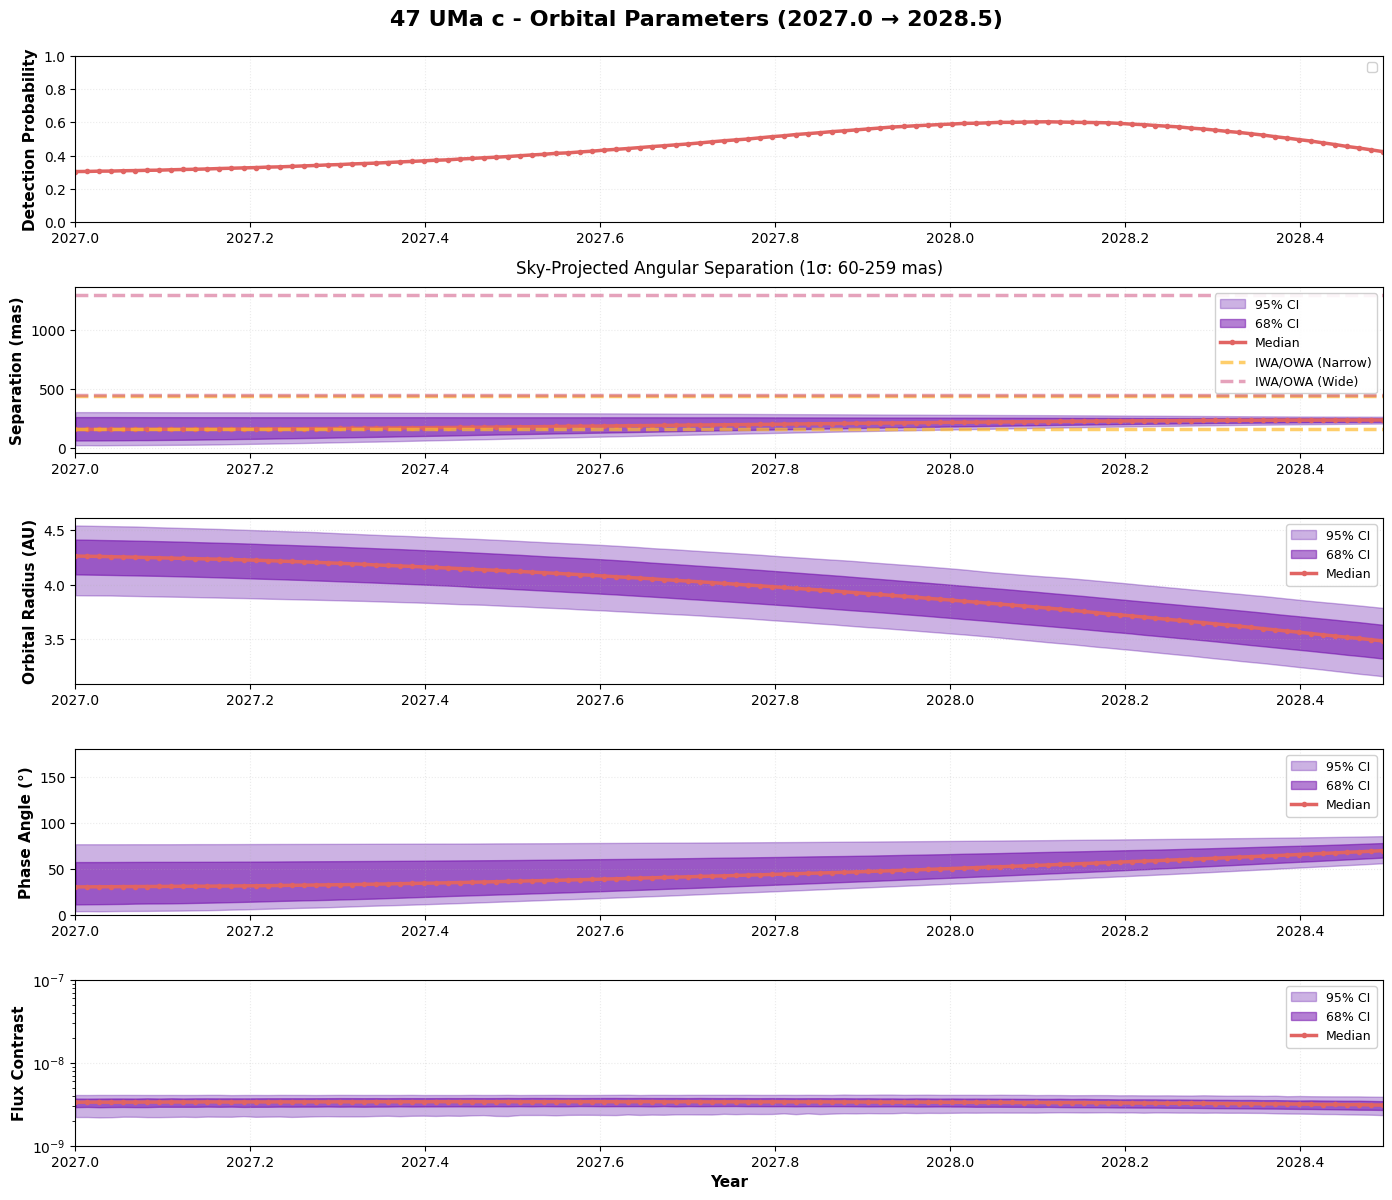

Planet index 1/14: 47_UMa_b
Loading point cloud from /Users/sbogat/Documents/01_Research/exoplanner_workspace/output/orbit_props/47_UMa_b_2027-01-01_to_2028-06-30_RVOnly_PointCloud.pkl
Calculating flux contrast & detectability...
Planet mass: 2.77 +1.64/-0.34 M_Jup
Planet radius: 1.00 +0.00/-0.00 R_Jup
Inclination: 90.05 [47.71, 132.65] degrees

Writing output to /Users/sbogat/Documents/01_Research/exoplanner_workspace/output/orbit_props/47_UMa_b_2027-01-01_to_2028-06-30_RVOnly.csv...
Plotting...
Plot saved to 47_UMa_b_2027-01-01_to_2028-06-30_RVOnly_orbital_params.png


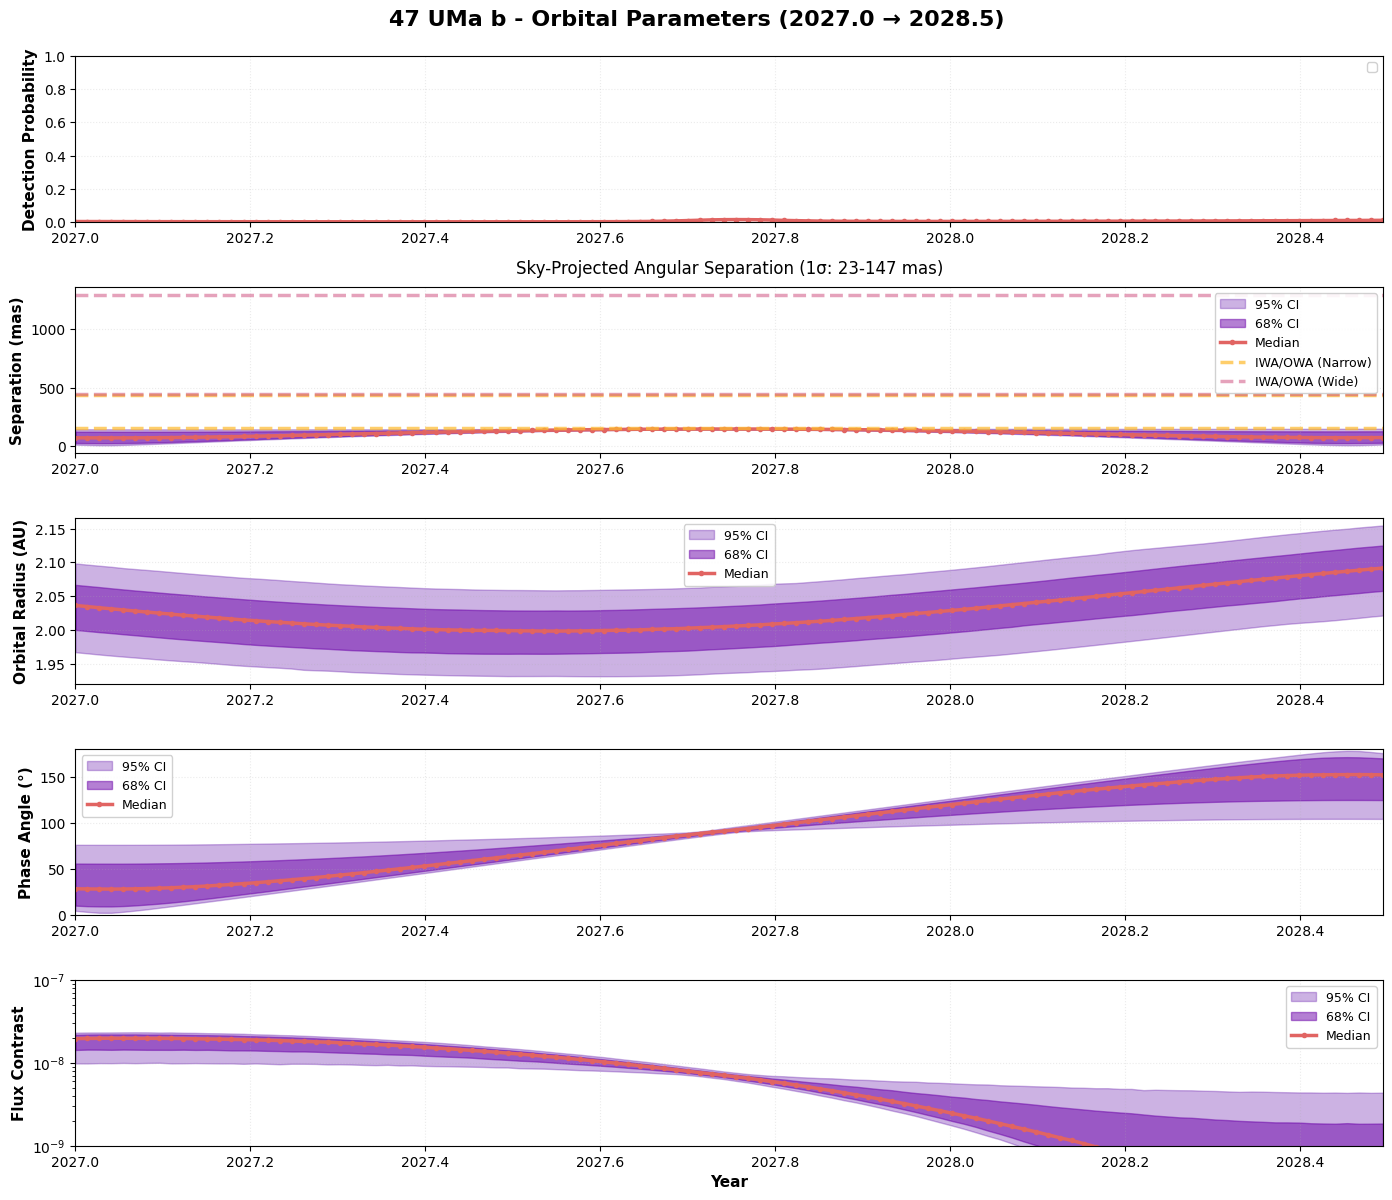

Planet index 2/14: 47_UMa_d
Loading point cloud from /Users/sbogat/Documents/01_Research/exoplanner_workspace/output/orbit_props/47_UMa_d_2027-01-01_to_2028-06-30_RVOnly_PointCloud.pkl
Calculating flux contrast & detectability...
Planet mass: 1.74 +1.00/-0.31 M_Jup
Planet radius: 1.00 +0.00/-0.00 R_Jup
Inclination: 90.21 [47.31, 132.78] degrees

Writing output to /Users/sbogat/Documents/01_Research/exoplanner_workspace/output/orbit_props/47_UMa_d_2027-01-01_to_2028-06-30_RVOnly.csv...
Plotting...
Plot saved to 47_UMa_d_2027-01-01_to_2028-06-30_RVOnly_orbital_params.png


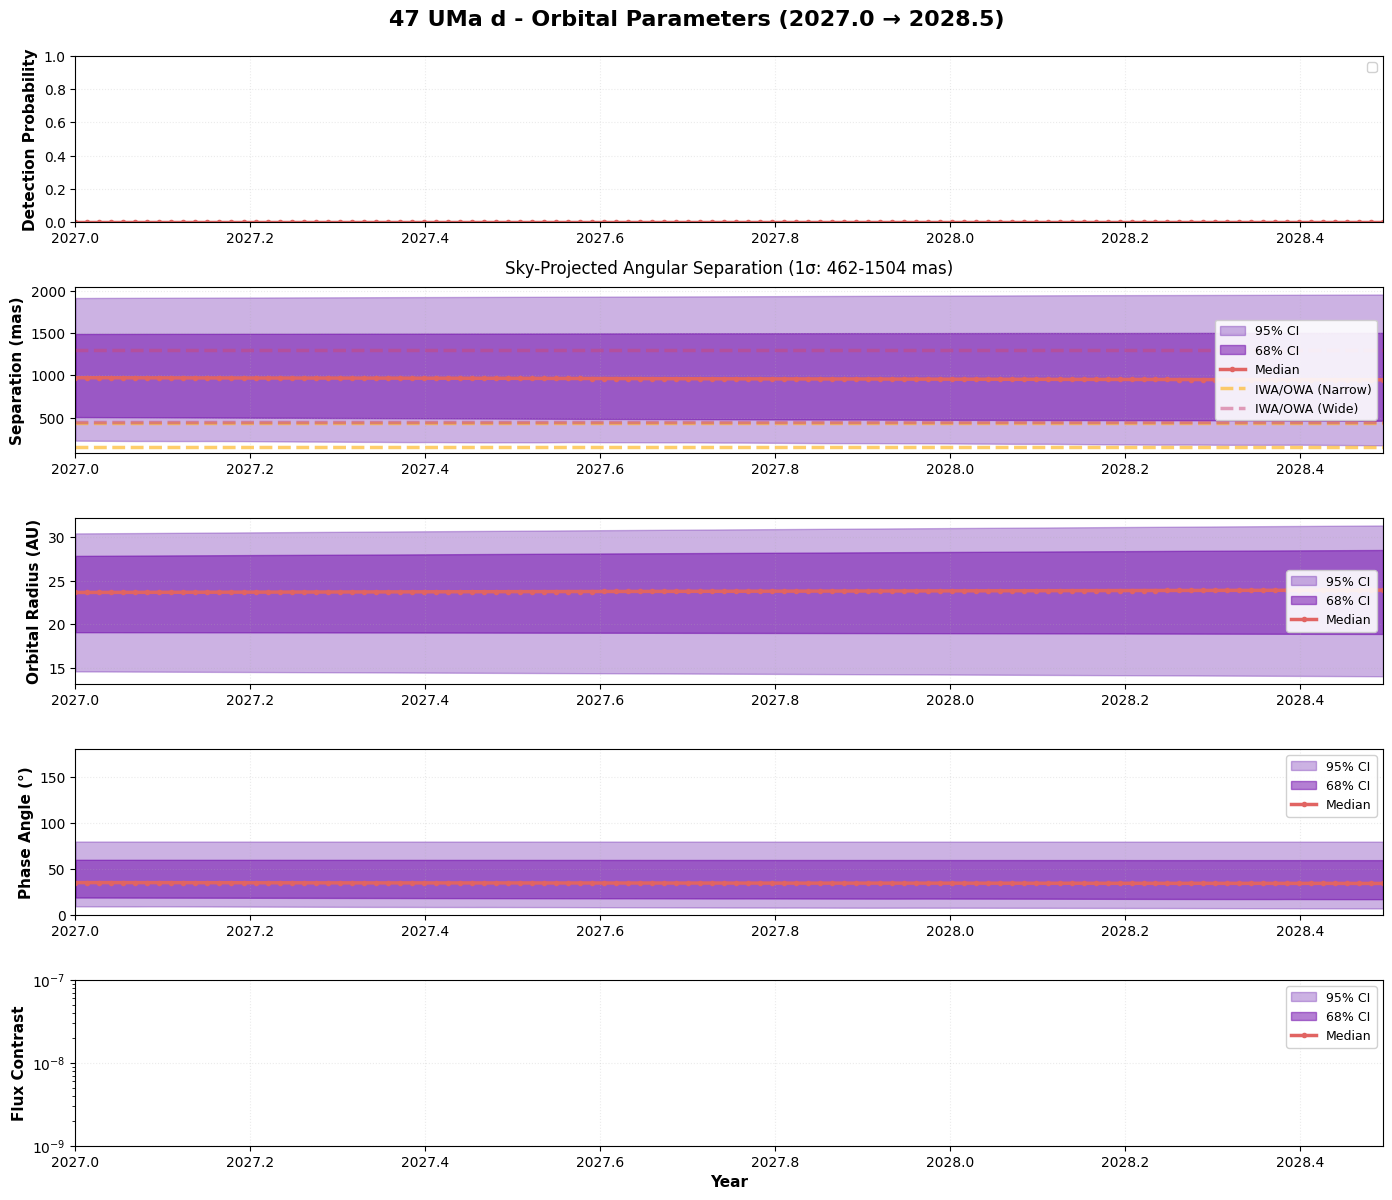

Planet index 3/14: 55_Cnc_d
Loading point cloud from /Users/sbogat/Documents/01_Research/exoplanner_workspace/output/orbit_props/55_Cnc_d_2027-01-01_to_2028-06-30_RVOnly_PointCloud.pkl
Calculating flux contrast & detectability...
Planet mass: 3.93 +2.28/-0.48 M_Jup
Planet radius: 1.00 +0.00/-0.00 R_Jup
Inclination: 90.07 [47.34, 133.13] degrees

Writing output to /Users/sbogat/Documents/01_Research/exoplanner_workspace/output/orbit_props/55_Cnc_d_2027-01-01_to_2028-06-30_RVOnly.csv...
Plotting...
Plot saved to 55_Cnc_d_2027-01-01_to_2028-06-30_RVOnly_orbital_params.png


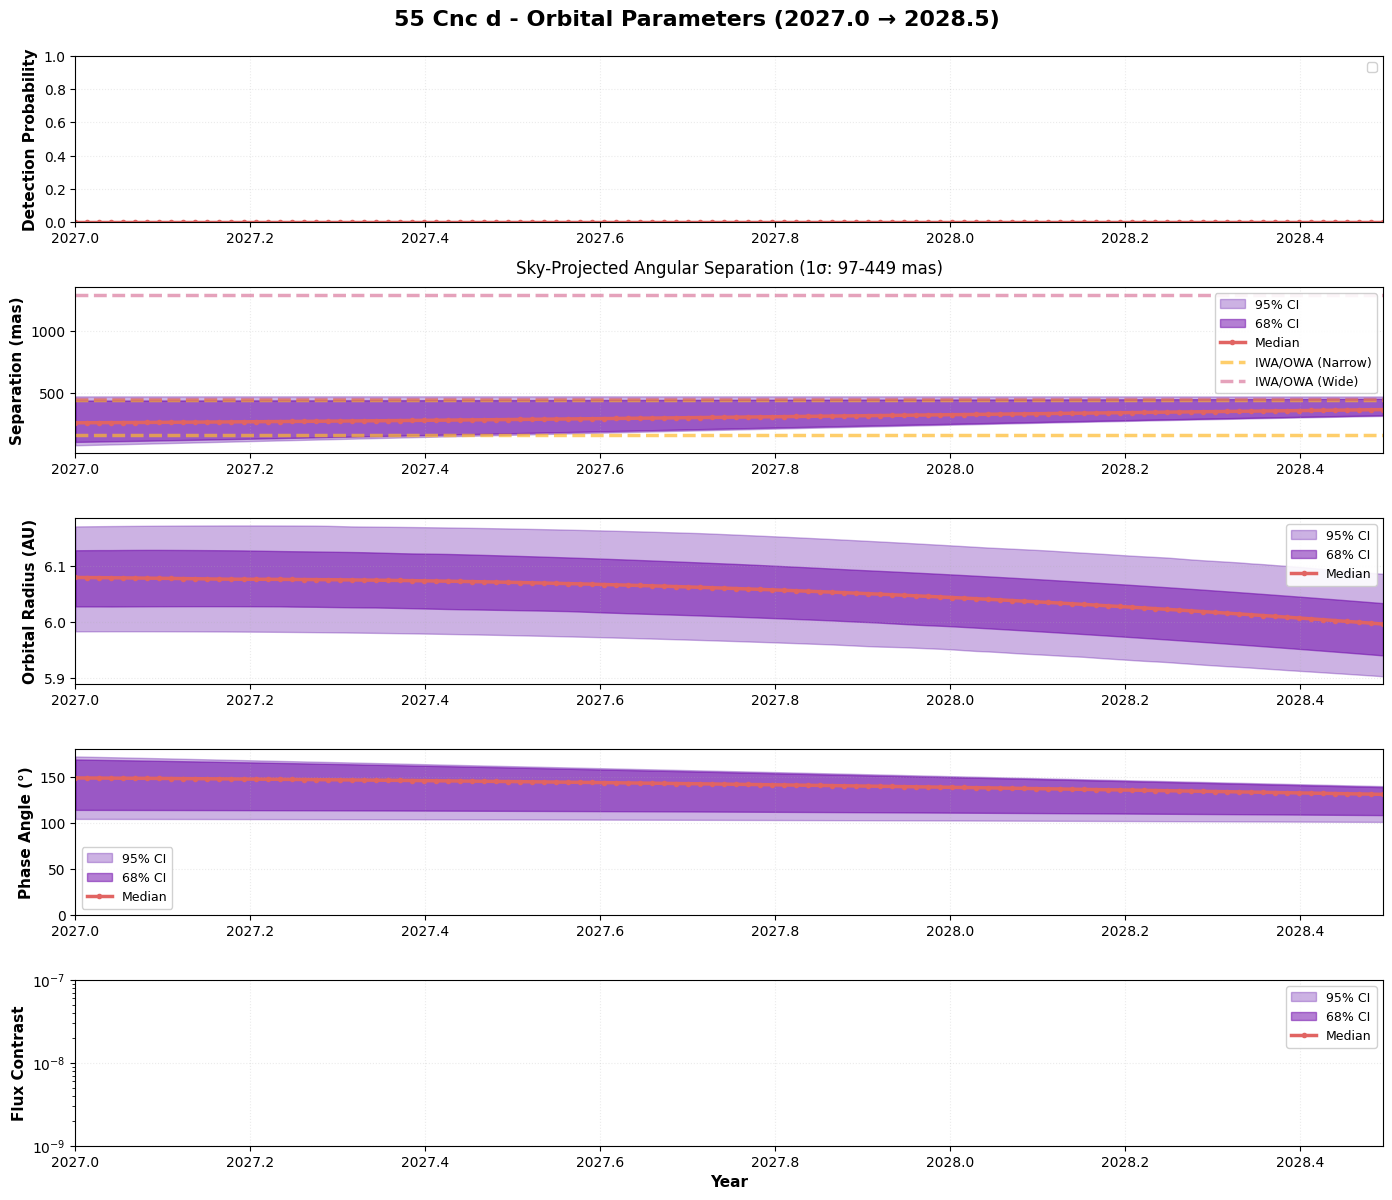

Planet index 4/14: eps_Eri_b
Loading point cloud from /Users/sbogat/Documents/01_Research/exoplanner_workspace/output/orbit_props/eps_Eri_b_2027-01-01_to_2028-06-30_RVOnly_PointCloud.pkl
Calculating flux contrast & detectability...
Planet mass: 0.74 +0.44/-0.10 M_Jup
Planet radius: 0.93 +0.07/-0.03 R_Jup
Inclination: 89.83 [47.07, 133.03] degrees

Writing output to /Users/sbogat/Documents/01_Research/exoplanner_workspace/output/orbit_props/eps_Eri_b_2027-01-01_to_2028-06-30_RVOnly.csv...
Plotting...
Plot saved to eps_Eri_b_2027-01-01_to_2028-06-30_RVOnly_orbital_params.png


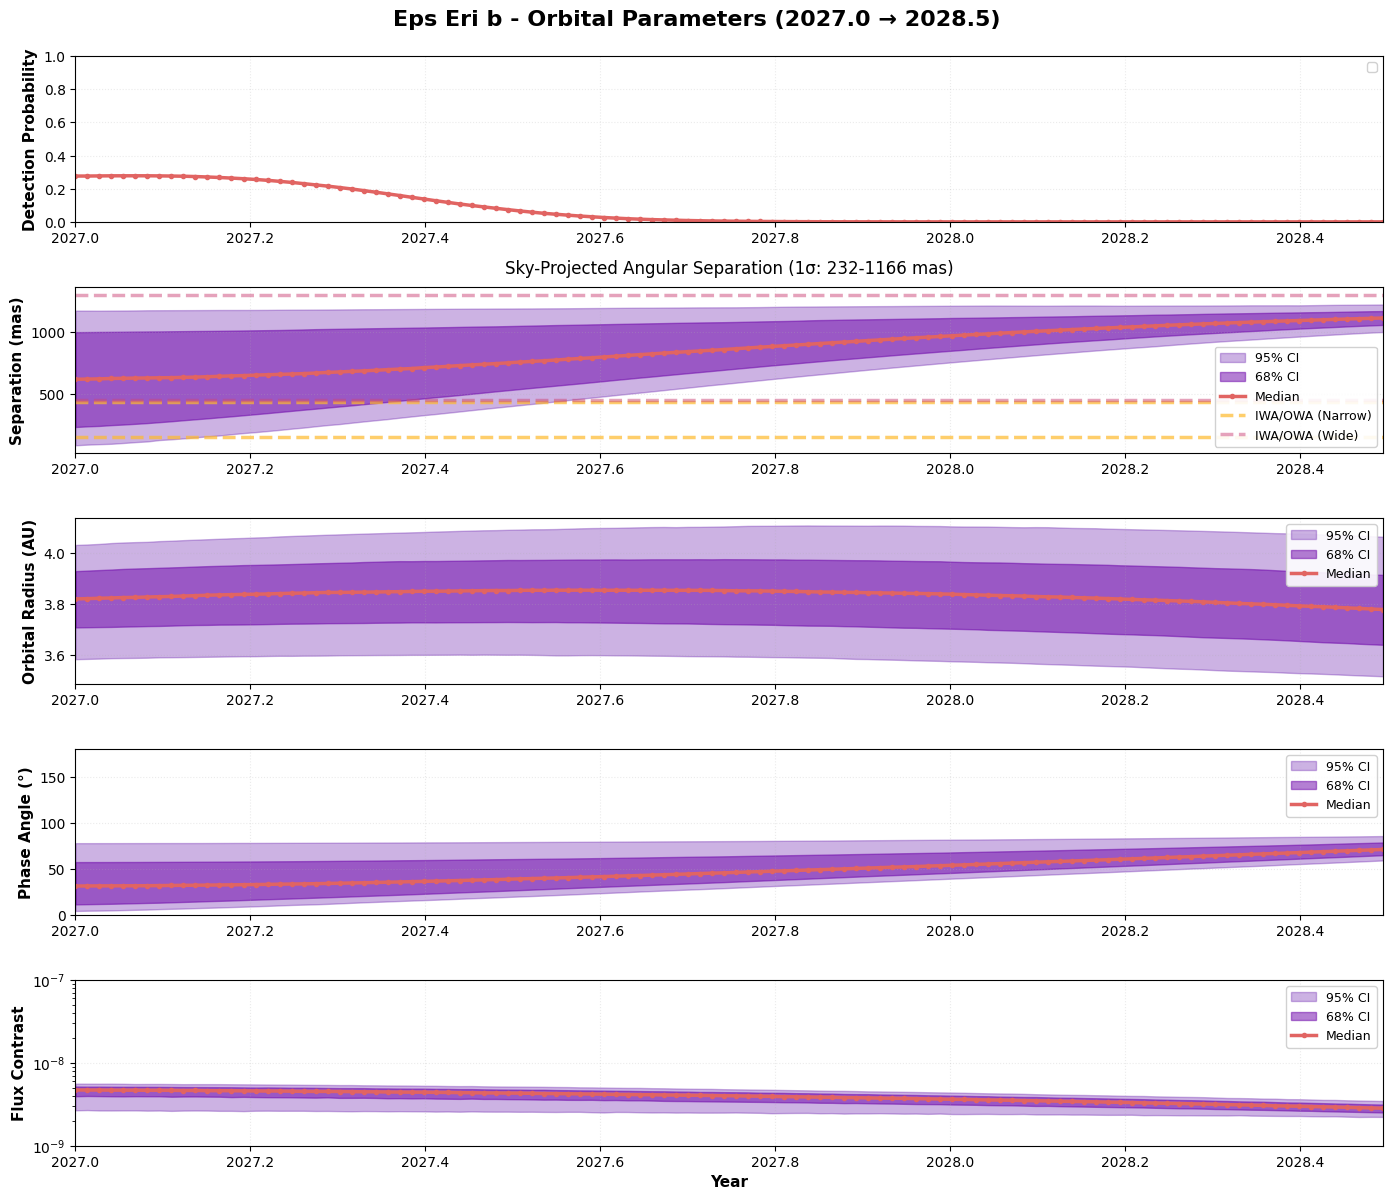

Planet index 5/14: HD_87883_b
Loading point cloud from /Users/sbogat/Documents/01_Research/exoplanner_workspace/output/orbit_props/HD_87883_b_2027-01-01_to_2028-06-30_RVOnly_PointCloud.pkl
Calculating flux contrast & detectability...
Planet mass: 2.63 +1.51/-0.37 M_Jup
Planet radius: 1.00 +0.00/-0.00 R_Jup
Inclination: 90.02 [47.51, 132.75] degrees

Writing output to /Users/sbogat/Documents/01_Research/exoplanner_workspace/output/orbit_props/HD_87883_b_2027-01-01_to_2028-06-30_RVOnly.csv...
Plotting...
Plot saved to HD_87883_b_2027-01-01_to_2028-06-30_RVOnly_orbital_params.png


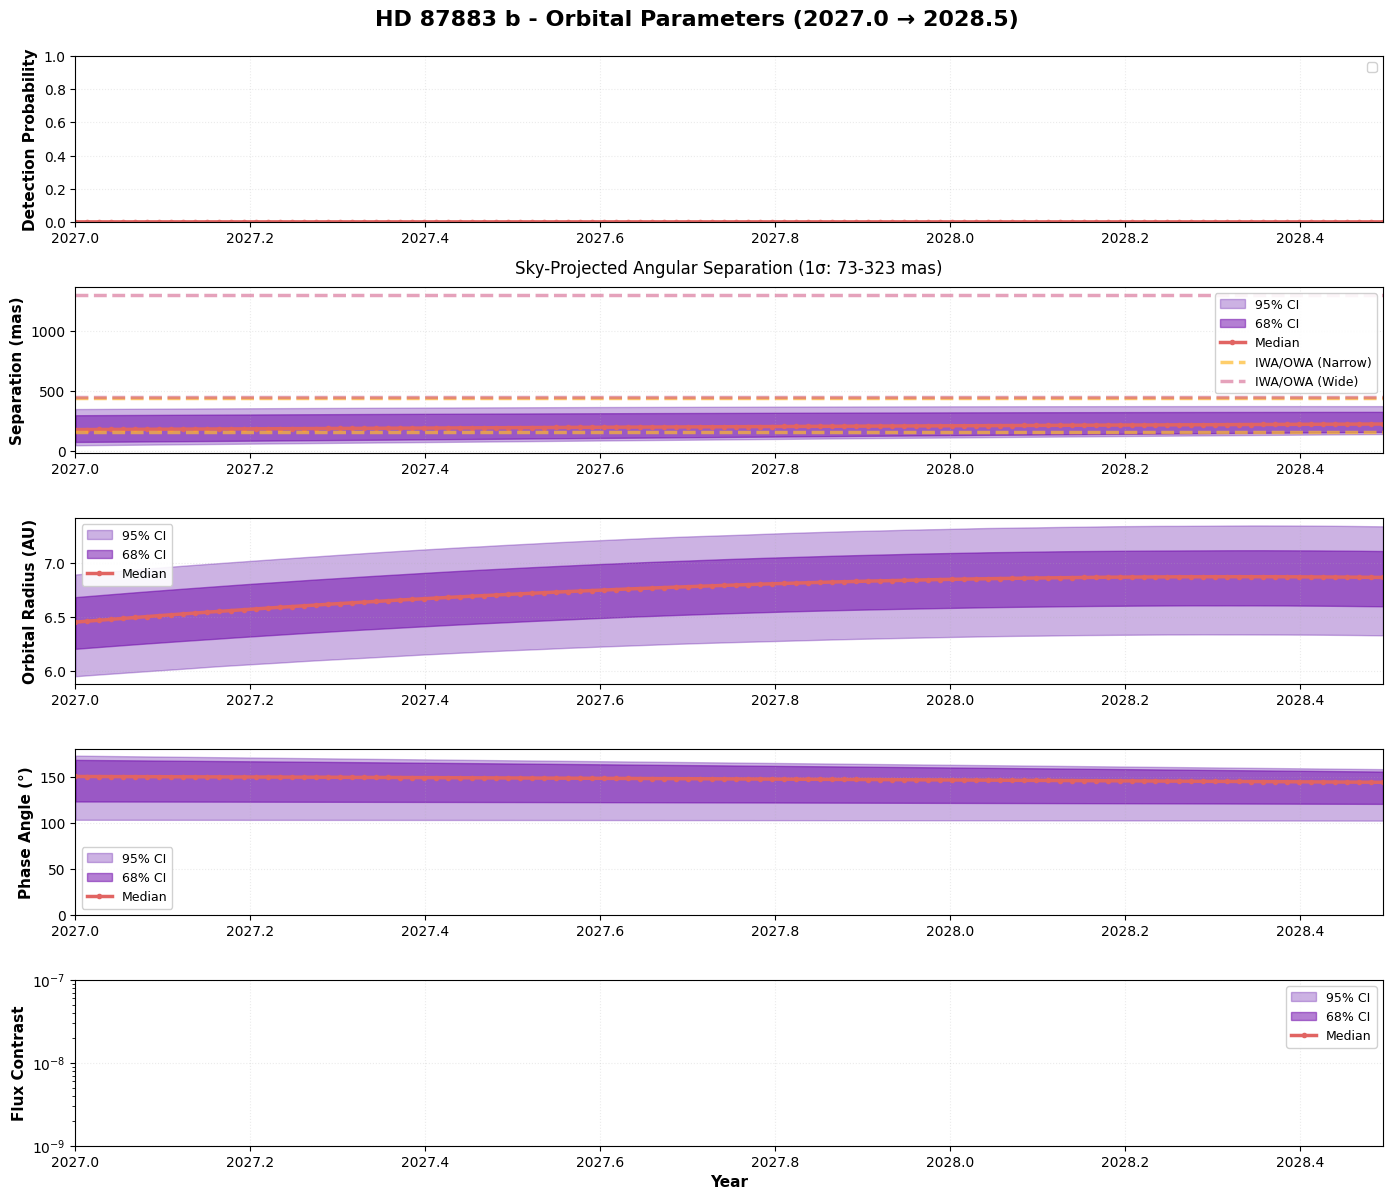

Planet index 6/14: HD_114783_c
Loading point cloud from /Users/sbogat/Documents/01_Research/exoplanner_workspace/output/orbit_props/HD_114783_c_2027-01-01_to_2028-06-30_RVOnly_PointCloud.pkl
Calculating flux contrast & detectability...
Planet mass: 0.82 +0.49/-0.11 M_Jup
Planet radius: 0.96 +0.04/-0.03 R_Jup
Inclination: 90.00 [47.03, 132.78] degrees

Writing output to /Users/sbogat/Documents/01_Research/exoplanner_workspace/output/orbit_props/HD_114783_c_2027-01-01_to_2028-06-30_RVOnly.csv...
Plotting...
Plot saved to HD_114783_c_2027-01-01_to_2028-06-30_RVOnly_orbital_params.png


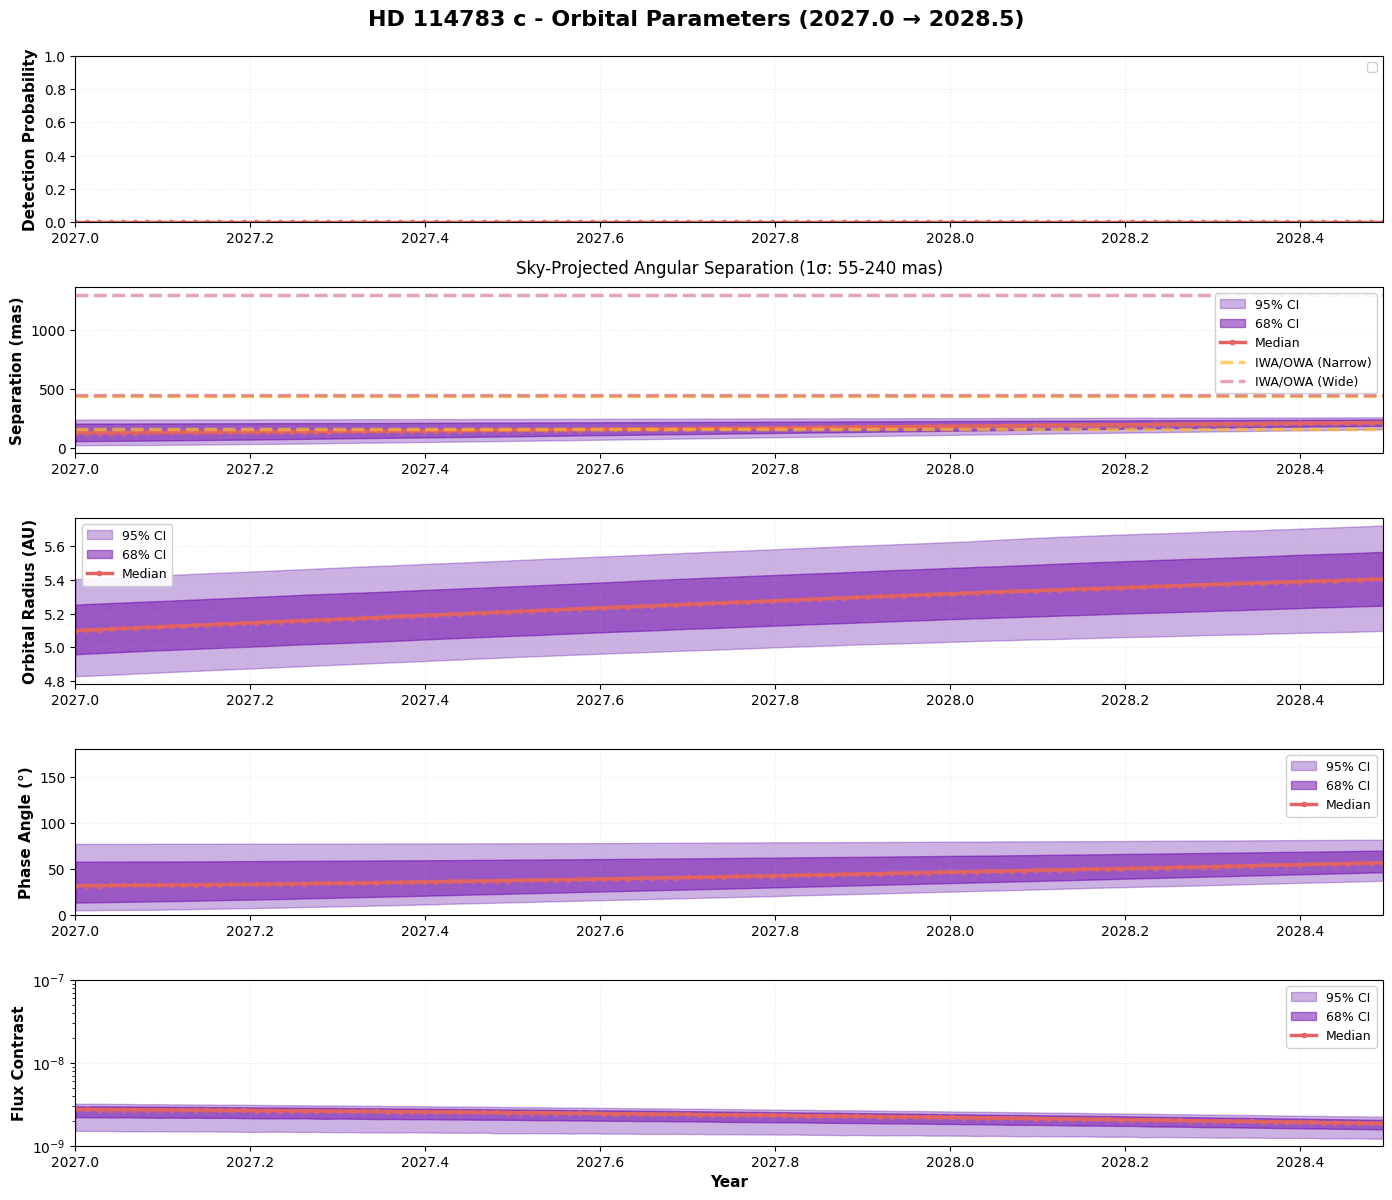

Planet index 7/14: HD_134987_c
Loading point cloud from /Users/sbogat/Documents/01_Research/exoplanner_workspace/output/orbit_props/HD_134987_c_2027-01-01_to_2028-06-30_RVOnly_PointCloud.pkl
Calculating flux contrast & detectability...
Planet mass: 1.23 +0.72/-0.15 M_Jup
Planet radius: 1.00 +0.00/-0.00 R_Jup
Inclination: 89.83 [46.97, 132.52] degrees

Writing output to /Users/sbogat/Documents/01_Research/exoplanner_workspace/output/orbit_props/HD_134987_c_2027-01-01_to_2028-06-30_RVOnly.csv...
Plotting...
Plot saved to HD_134987_c_2027-01-01_to_2028-06-30_RVOnly_orbital_params.png


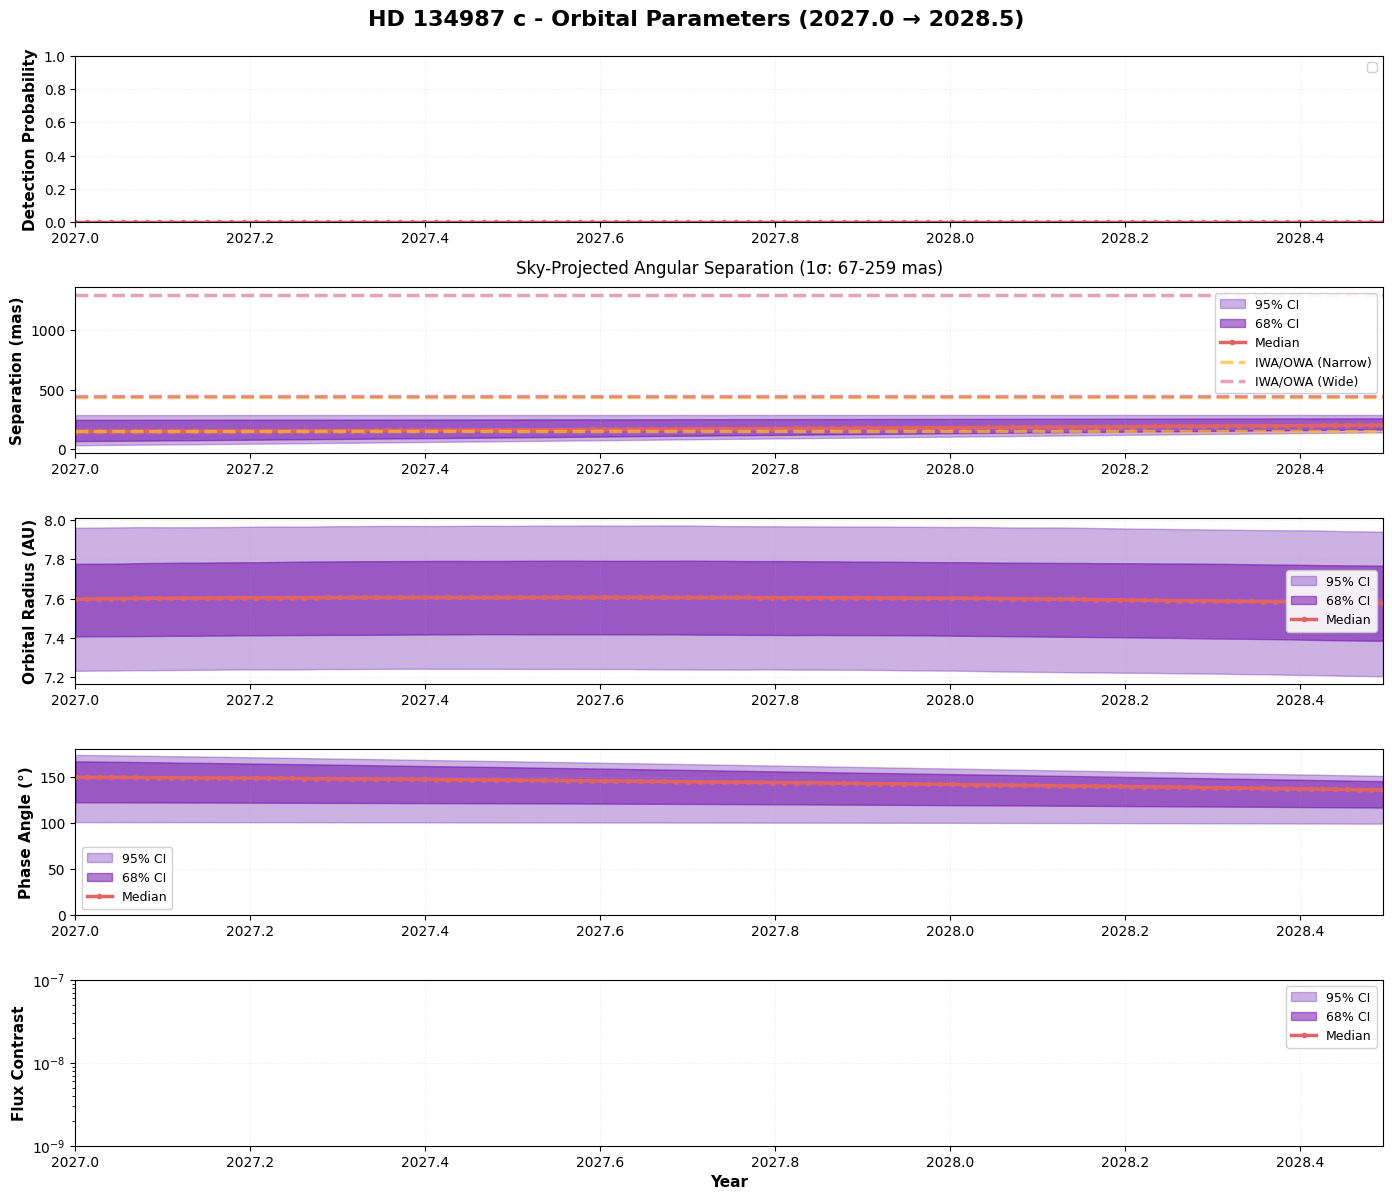

Planet index 8/14: HD_154345_b
Loading point cloud from /Users/sbogat/Documents/01_Research/exoplanner_workspace/output/orbit_props/HD_154345_b_2027-01-01_to_2028-06-30_RVOnly_PointCloud.pkl
Calculating flux contrast & detectability...
Planet mass: 1.26 +0.73/-0.18 M_Jup
Planet radius: 1.00 +0.00/-0.00 R_Jup
Inclination: 89.85 [47.24, 132.73] degrees

Writing output to /Users/sbogat/Documents/01_Research/exoplanner_workspace/output/orbit_props/HD_154345_b_2027-01-01_to_2028-06-30_RVOnly.csv...
Plotting...
Plot saved to HD_154345_b_2027-01-01_to_2028-06-30_RVOnly_orbital_params.png


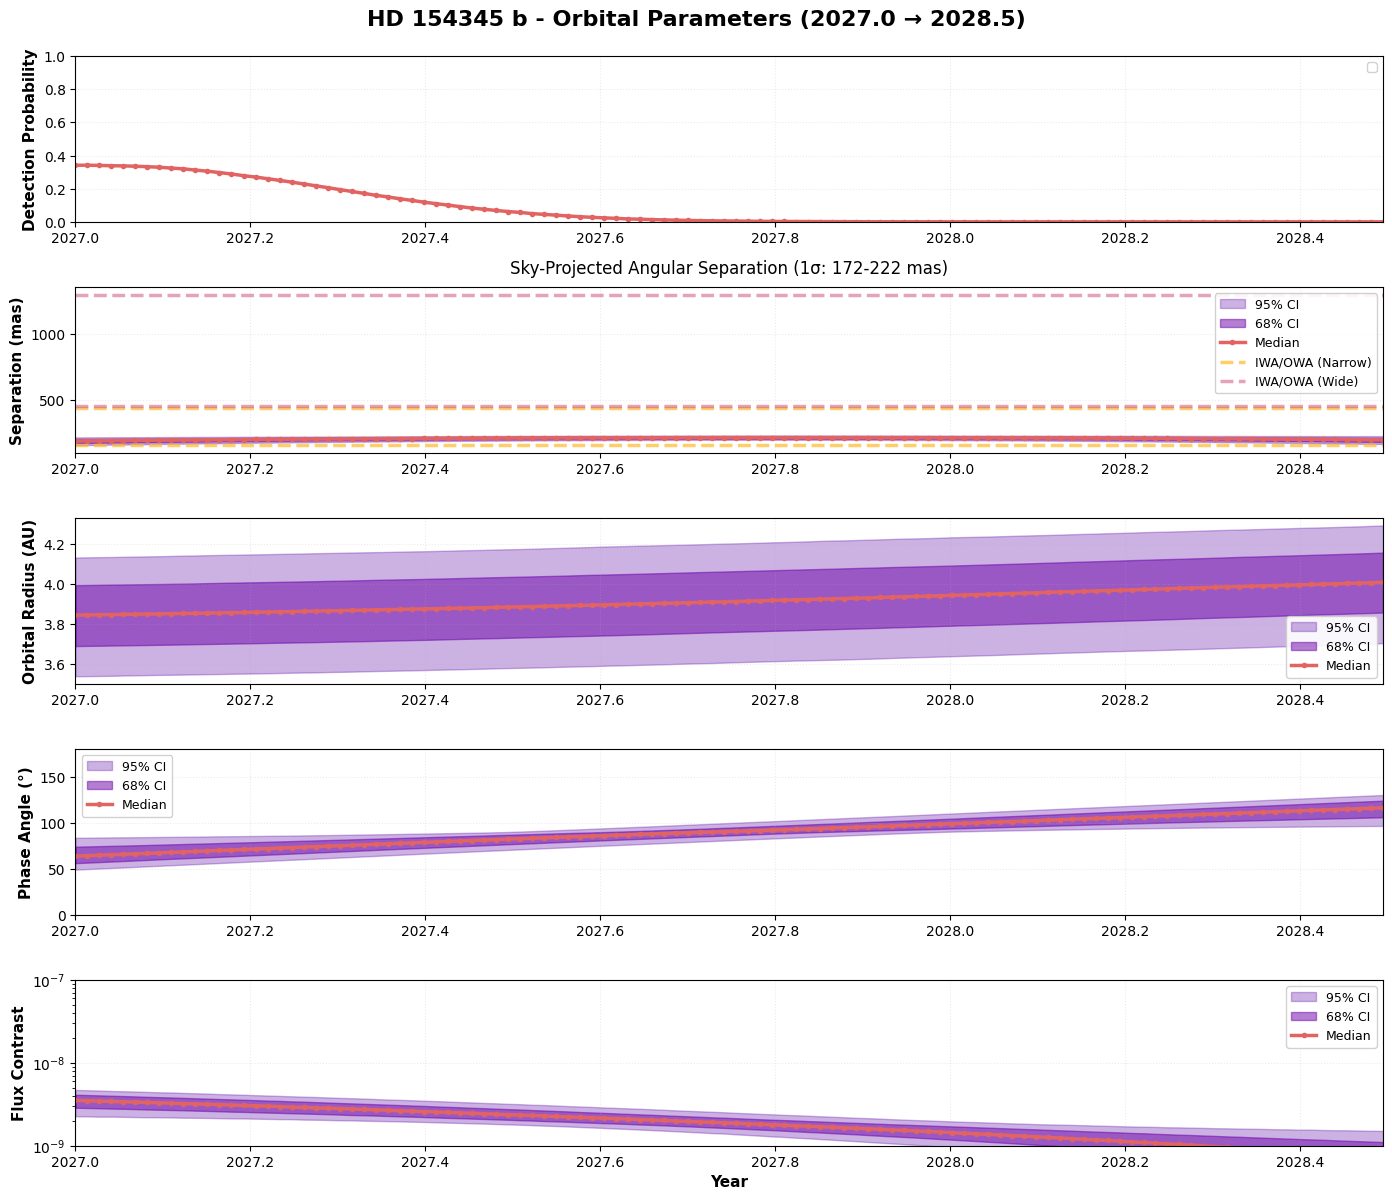

Planet index 9/14: HD_160691_c
Loading point cloud from /Users/sbogat/Documents/01_Research/exoplanner_workspace/output/orbit_props/HD_160691_c_2027-01-01_to_2028-06-30_RVOnly_PointCloud.pkl
Calculating flux contrast & detectability...
Planet mass: 2.14 +1.28/-0.26 M_Jup
Planet radius: 1.00 +0.00/-0.00 R_Jup
Inclination: 90.00 [47.26, 132.81] degrees

Writing output to /Users/sbogat/Documents/01_Research/exoplanner_workspace/output/orbit_props/HD_160691_c_2027-01-01_to_2028-06-30_RVOnly.csv...
Plotting...
Plot saved to HD_160691_c_2027-01-01_to_2028-06-30_RVOnly_orbital_params.png


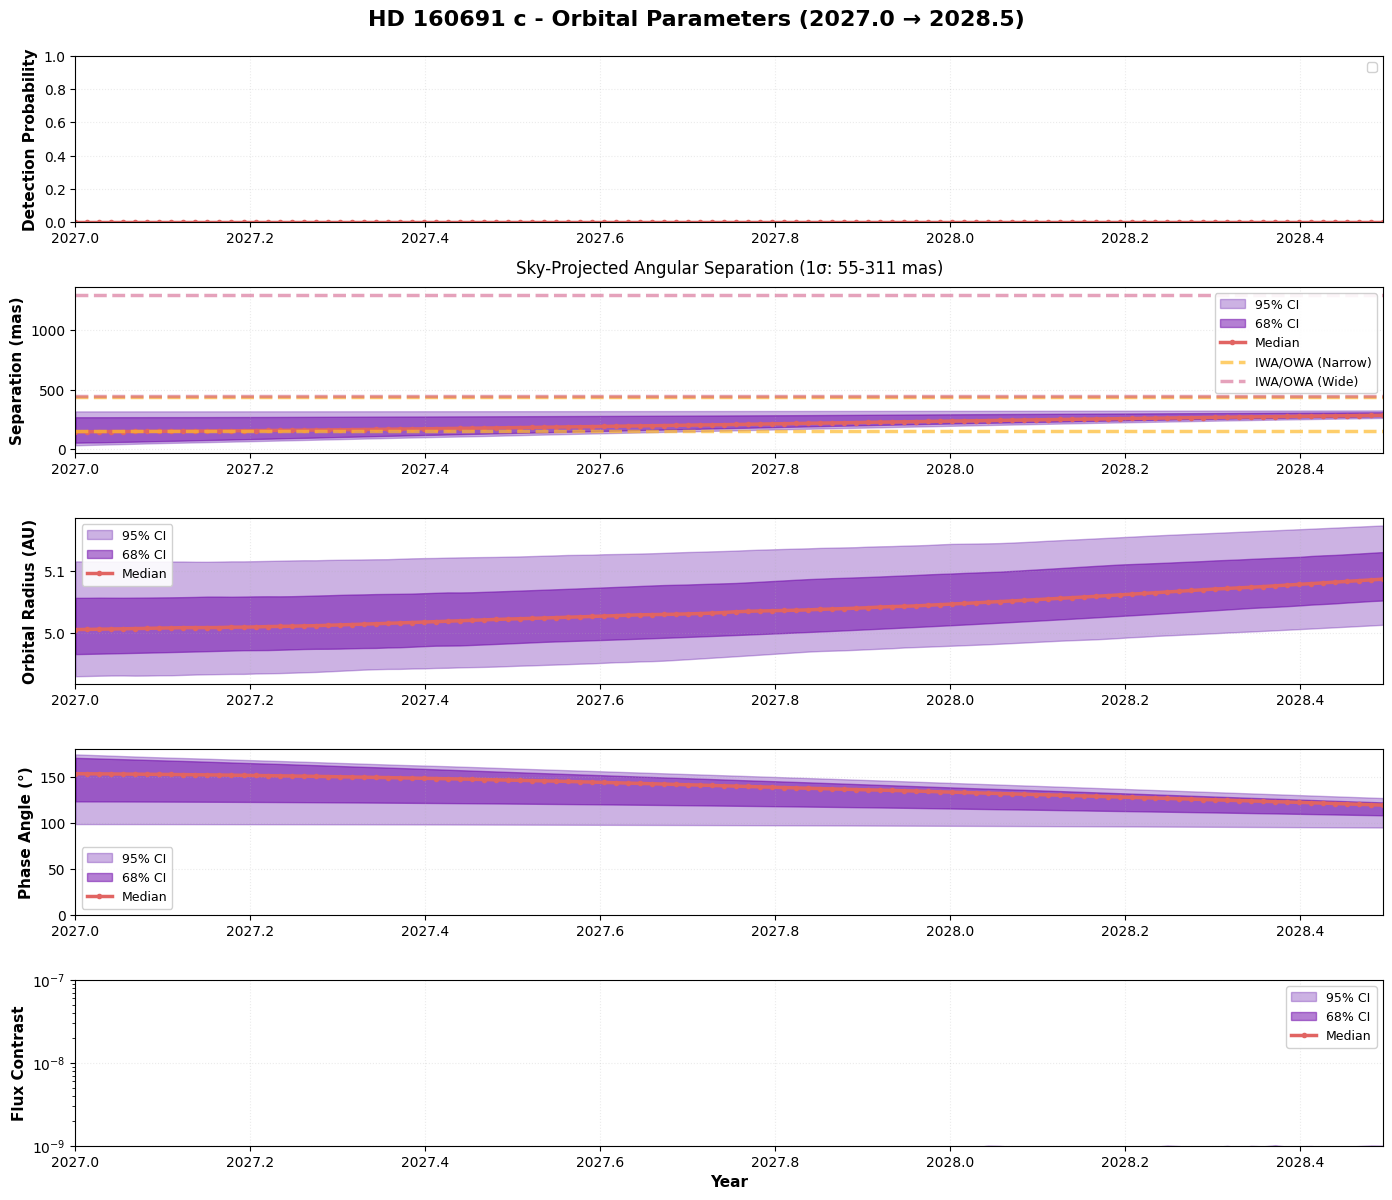

Planet index 10/14: HD_190360_b
Loading point cloud from /Users/sbogat/Documents/01_Research/exoplanner_workspace/output/orbit_props/HD_190360_b_2027-01-01_to_2028-06-30_RVOnly_PointCloud.pkl
Calculating flux contrast & detectability...
Planet mass: 1.76 +1.04/-0.24 M_Jup
Planet radius: 1.00 +0.00/-0.00 R_Jup
Inclination: 90.07 [47.07, 132.83] degrees

Writing output to /Users/sbogat/Documents/01_Research/exoplanner_workspace/output/orbit_props/HD_190360_b_2027-01-01_to_2028-06-30_RVOnly.csv...
Plotting...
Plot saved to HD_190360_b_2027-01-01_to_2028-06-30_RVOnly_orbital_params.png


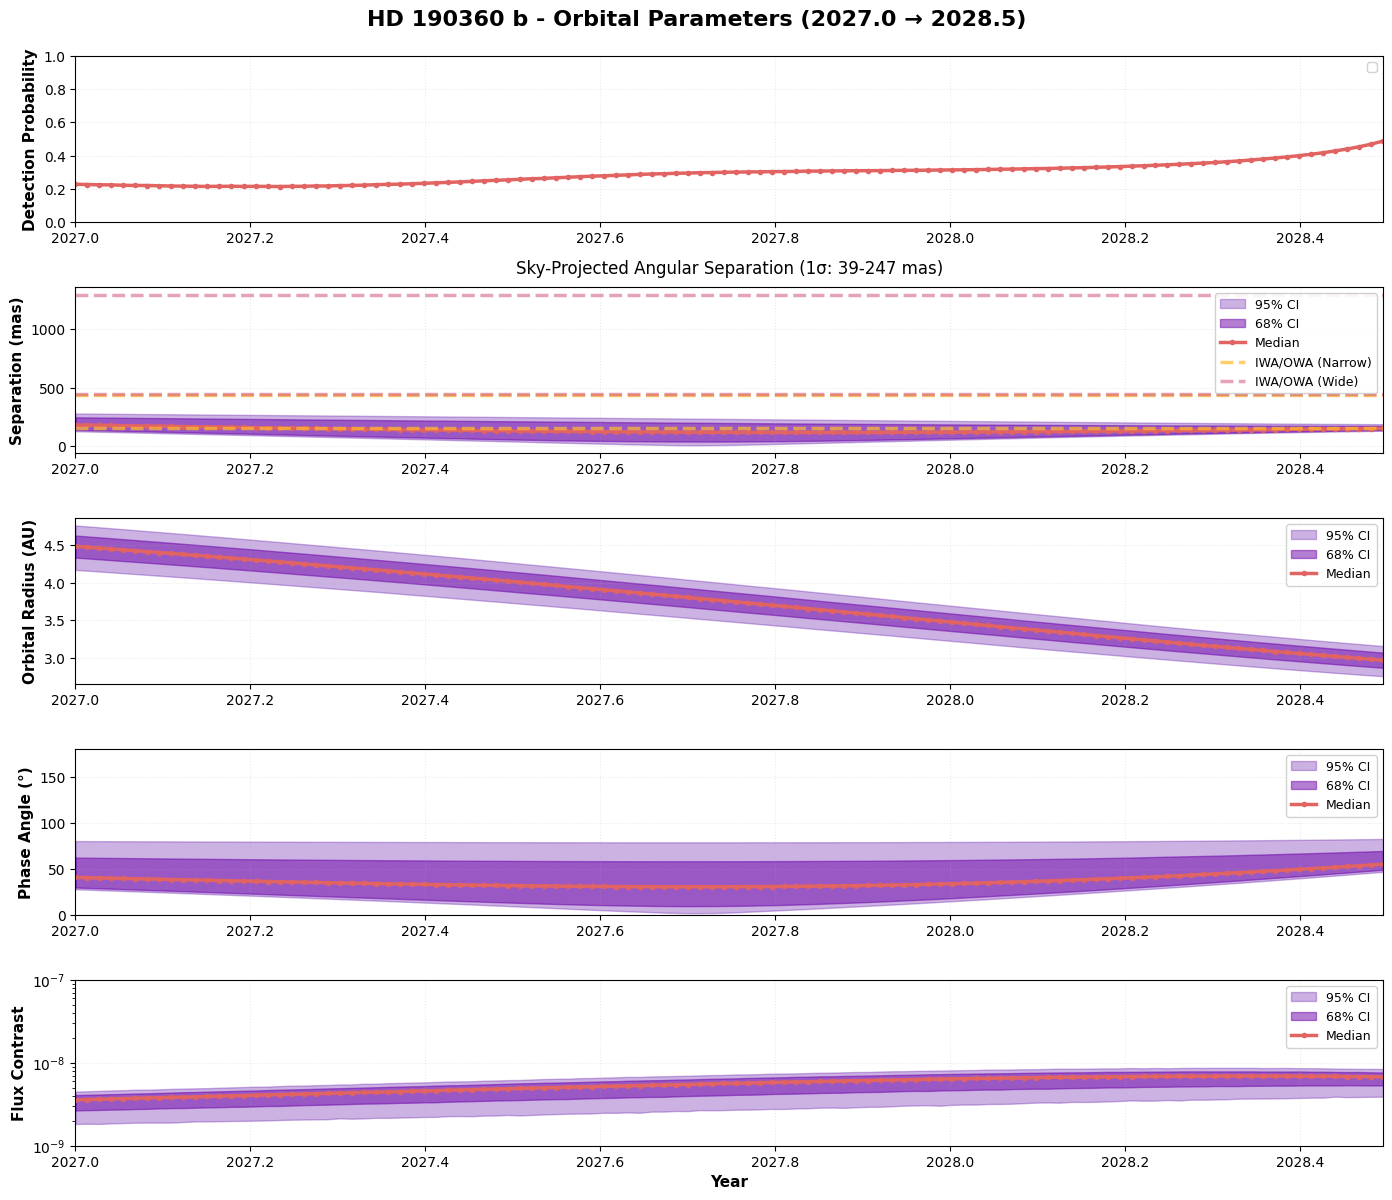

Planet index 11/14: HD_217107_c
Loading point cloud from /Users/sbogat/Documents/01_Research/exoplanner_workspace/output/orbit_props/HD_217107_c_2027-01-01_to_2028-06-30_RVOnly_PointCloud.pkl
Calculating flux contrast & detectability...
Planet mass: 4.96 +2.94/-0.60 M_Jup
Planet radius: 1.00 +0.00/-0.00 R_Jup
Inclination: 90.37 [47.41, 133.18] degrees

Writing output to /Users/sbogat/Documents/01_Research/exoplanner_workspace/output/orbit_props/HD_217107_c_2027-01-01_to_2028-06-30_RVOnly.csv...
Plotting...
Plot saved to HD_217107_c_2027-01-01_to_2028-06-30_RVOnly_orbital_params.png


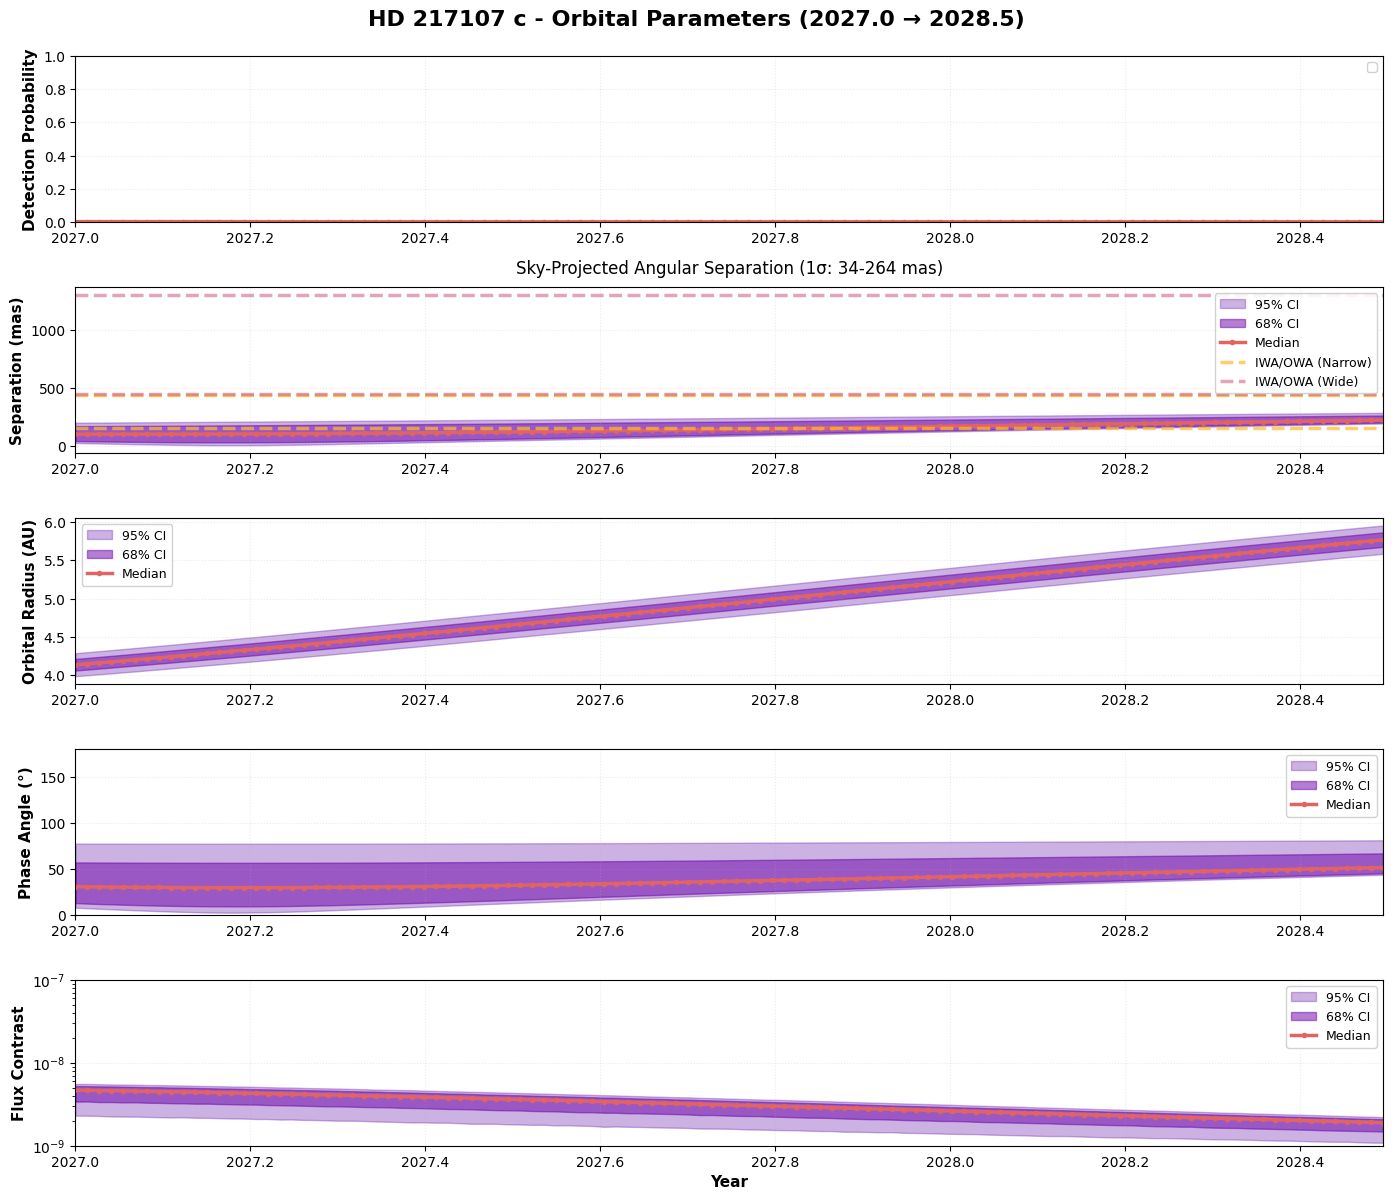

Planet index 12/14: pi_Men_b
Loading point cloud from /Users/sbogat/Documents/01_Research/exoplanner_workspace/output/orbit_props/pi_Men_b_2027-01-01_to_2028-06-30_RVOnly_PointCloud.pkl
Calculating flux contrast & detectability...
Planet mass: 11.61 +6.47/-1.71 M_Jup
Planet radius: 1.00 +0.00/-0.00 R_Jup
Inclination: 90.61 [48.22, 133.06] degrees

Writing output to /Users/sbogat/Documents/01_Research/exoplanner_workspace/output/orbit_props/pi_Men_b_2027-01-01_to_2028-06-30_RVOnly.csv...
Plotting...
Plot saved to pi_Men_b_2027-01-01_to_2028-06-30_RVOnly_orbital_params.png


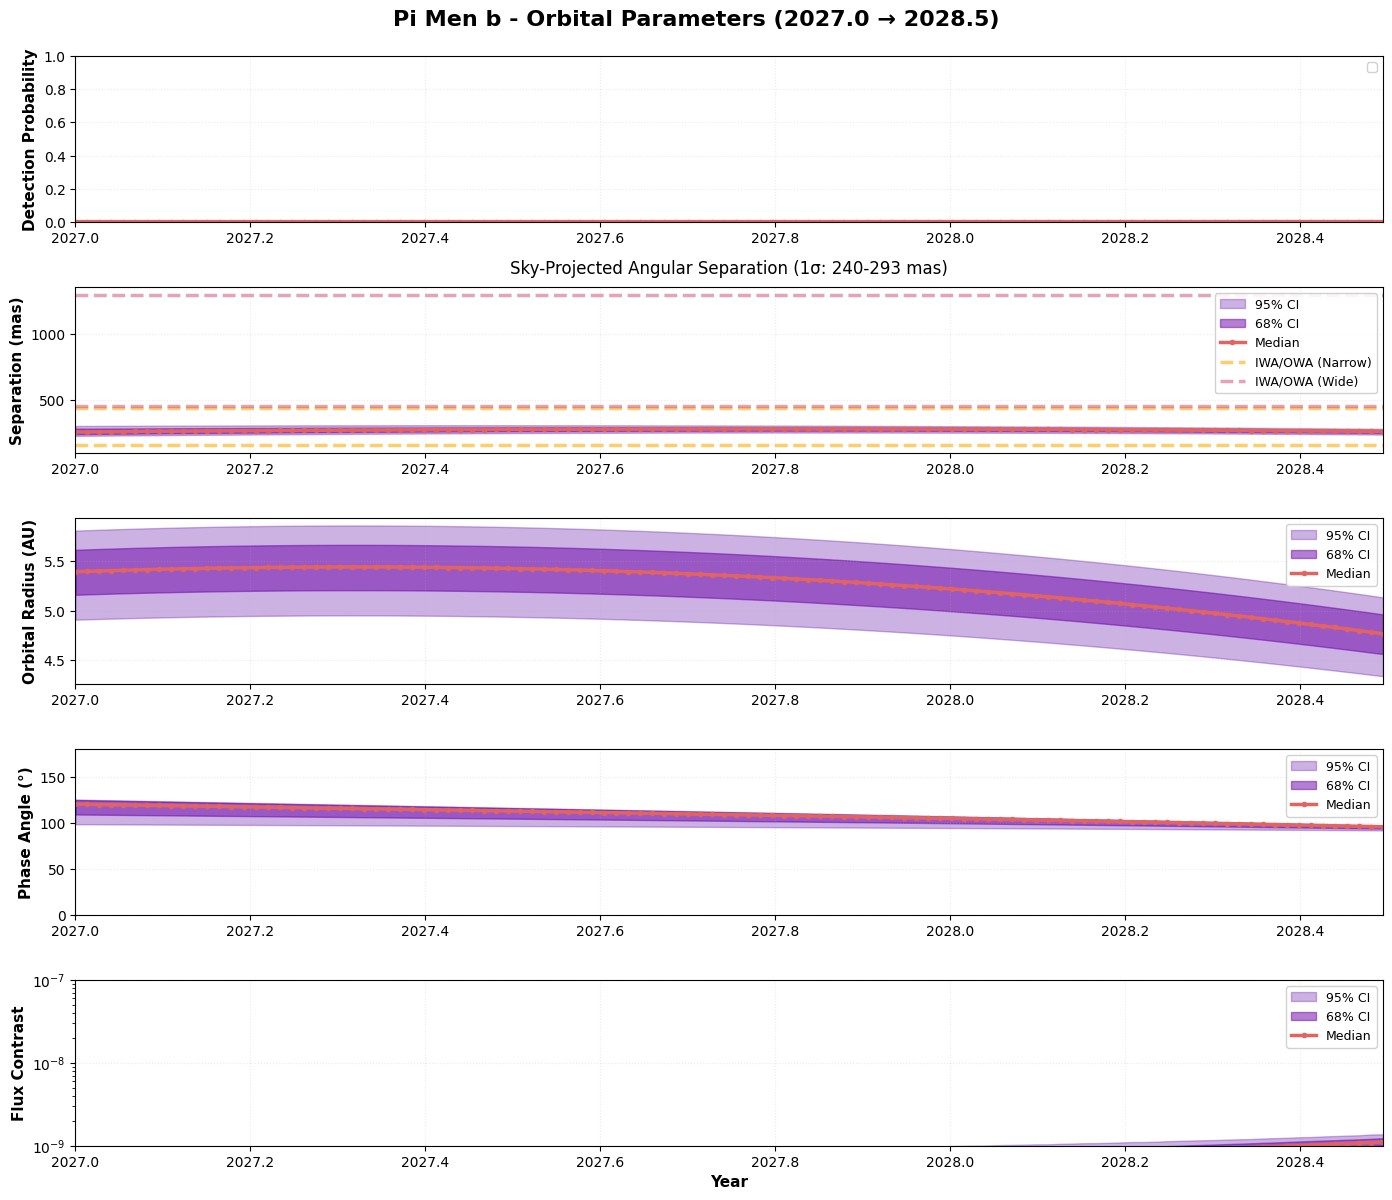

Planet index 13/14: ups_And_d
Loading point cloud from /Users/sbogat/Documents/01_Research/exoplanner_workspace/output/orbit_props/ups_And_d_2027-01-01_to_2028-06-30_RVOnly_PointCloud.pkl
Calculating flux contrast & detectability...
Planet mass: 4.61 +2.75/-0.56 M_Jup
Planet radius: 1.00 +0.00/-0.00 R_Jup
Inclination: 90.26 [47.25, 132.98] degrees

Writing output to /Users/sbogat/Documents/01_Research/exoplanner_workspace/output/orbit_props/ups_And_d_2027-01-01_to_2028-06-30_RVOnly.csv...
Plotting...
Plot saved to ups_And_d_2027-01-01_to_2028-06-30_RVOnly_orbital_params.png


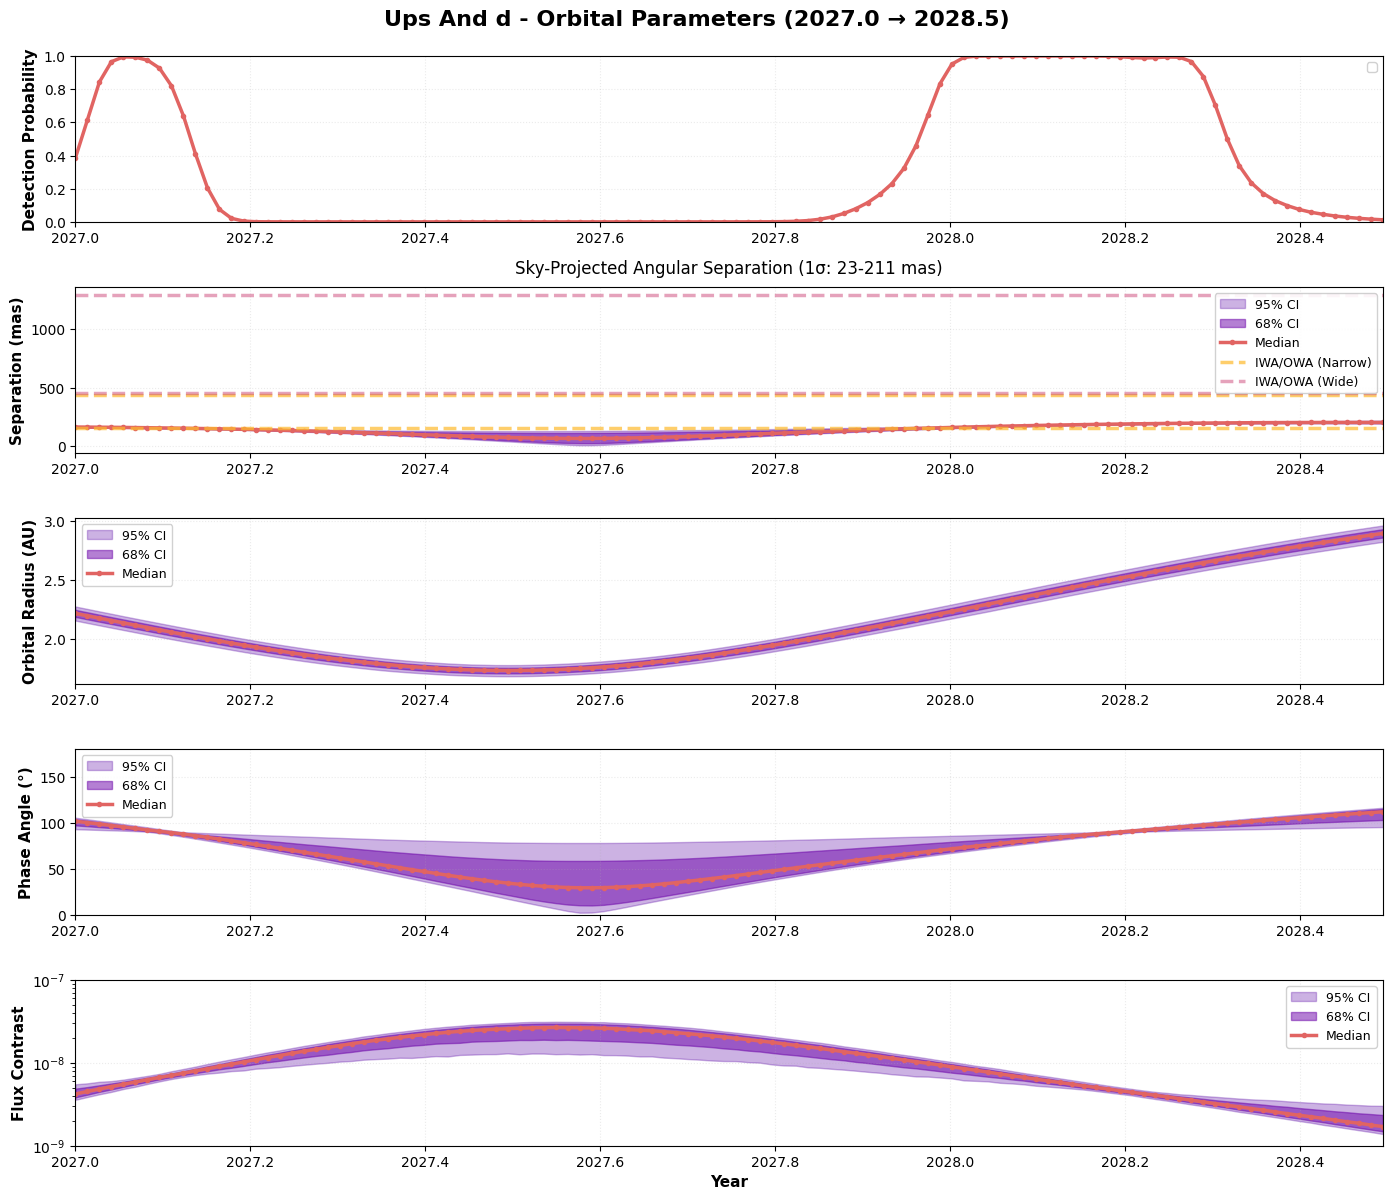

Planet index 14/14: HD_192310_c
Loading point cloud from /Users/sbogat/Documents/01_Research/exoplanner_workspace/output/orbit_props/HD_192310_c_2027-01-01_to_2028-06-30_RVOnly_PointCloud.pkl
Calculating flux contrast & detectability...
Planet mass: 0.08 +0.04/-0.01 M_Jup
Planet radius: 0.38 +0.10/-0.03 R_Jup
Inclination: 90.00 [46.98, 132.88] degrees

Writing output to /Users/sbogat/Documents/01_Research/exoplanner_workspace/output/orbit_props/HD_192310_c_2027-01-01_to_2028-06-30_RVOnly.csv...
Plotting...
Plot saved to HD_192310_c_2027-01-01_to_2028-06-30_RVOnly_orbital_params.png


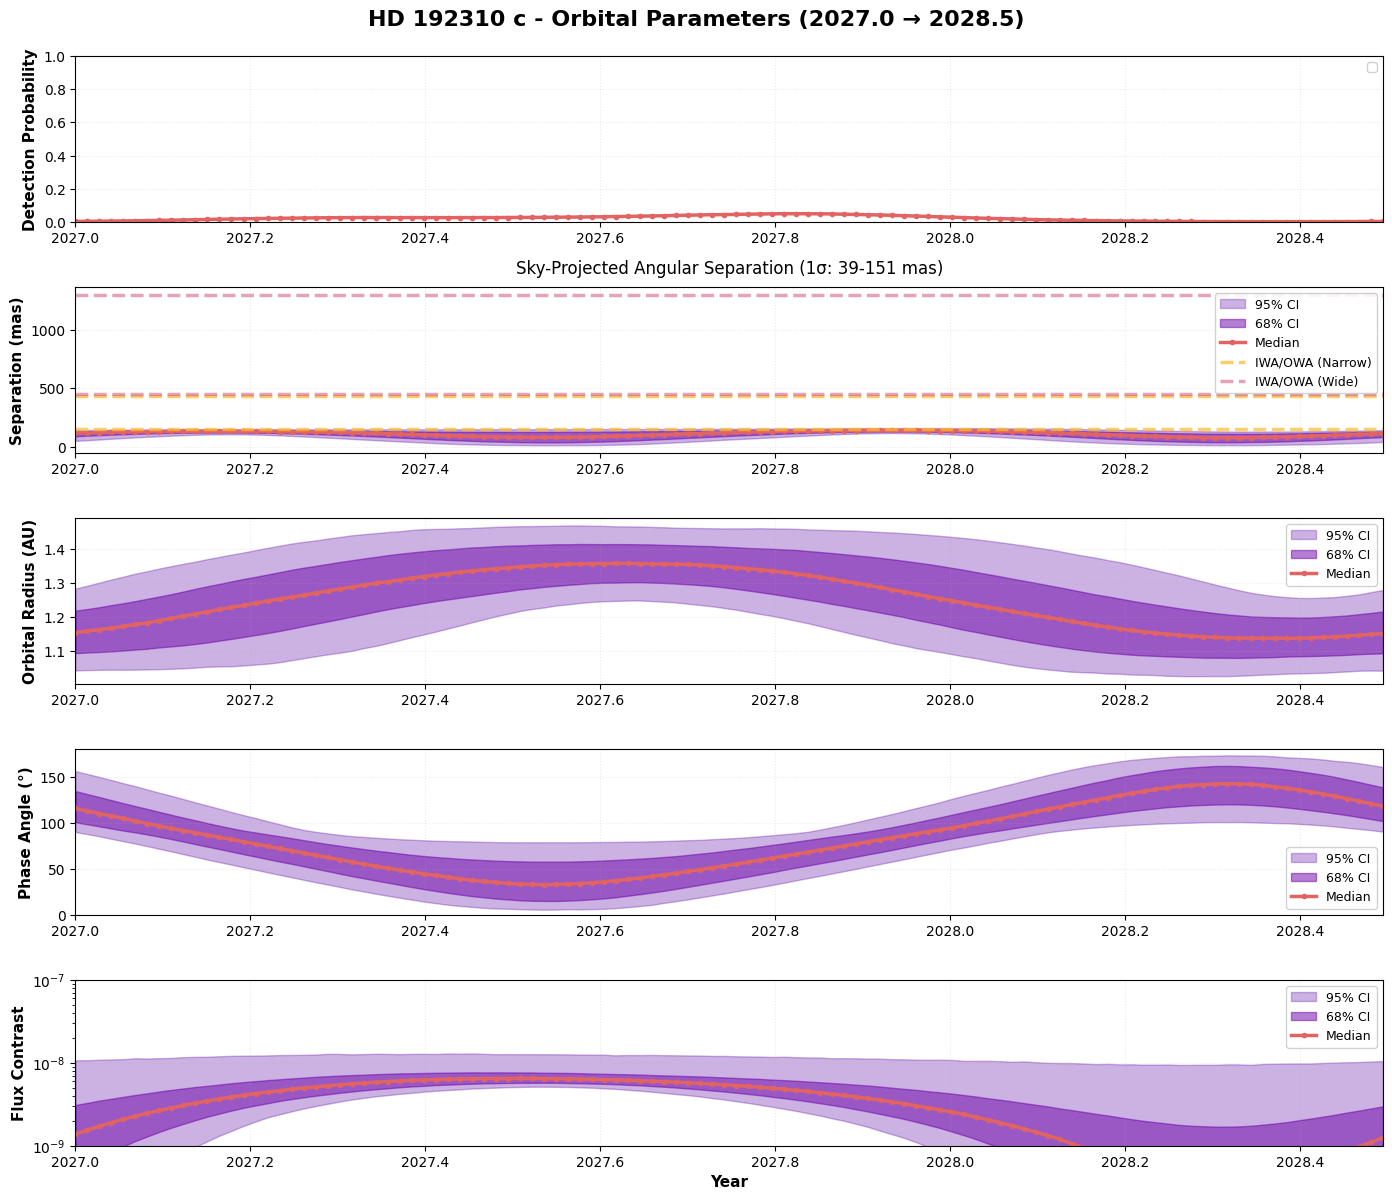

In [ ]:
planets = list(orbit_params.keys())
start_date, end_date = "2027-01-01", "2028-06-30"
plot=True
orbit_props_dir = '/Users/sbogat/Documents/01_Research/exoplanner_workspace/output/orbit_props'

# Temporary while we wait for albedos from Dmitry
albedo_med = 0.4 # From jupiter albedo, Lacy&Burrows 2019 https://arxiv.org/pdf/1911.10585
albedo_std = 0.01

for p,planet in enumerate(planets):

    fname_base = f"{planet}_{start_date}_to_{end_date}_RVOnly"
    # Load saved point cloud
    print(f'Planet index {p}/{len(planets)-1}: {planet}')
    point_cloud_fname = f"{fname_base}_PointCloud.pkl"
    point_cloud = load_point_cloud(planet,
                     i_dir=orbit_props_dir,
                     fname=point_cloud_fname
                     )
    

    # Calculate flux contrast

    # TODO: Update to use albedos/phasecurve from dmitry
    print('Calculating flux contrast & detectability...')
    albedos = np.random.normal(albedo_med,albedo_std,size=point_cloud['sep_mas'].shape)
    phase_angle_rad = point_cloud['phase_angle_deg'] * np.pi / 180.
    point_cloud['lambert_phase'] = (np.sin(phase_angle_rad)+(np.pi-phase_angle_rad)*np.cos(phase_angle_rad))/np.pi
    point_cloud['phi_x_a'] = point_cloud['lambert_phase'] * albedos
    
    point_cloud['flux_contrast'] = point_cloud['phi_x_a'] * (point_cloud['r_pl_rjup']*u.R_jup.to(u.AU) / point_cloud['orbital_radius_au'])**2

    point_cloud['is_detectable'] = is_detectable(point_cloud['sep_mas'],
                                                 point_cloud['flux_contrast'],
                                                 concurve)
     
    point_cloud['detection_probability'] = weighted_mean(point_cloud['is_detectable'],
                                                      weights=point_cloud['ln_likelihood'])
    
    csv_data = gen_summary_csv(
        planet,
        point_cloud,
        orbit_props_dir,
        fname_base)    
    
    print('Plotting...')
    plot_outfpath = os.path.join(orbit_props_dir,fname_base)
    plot_orbital_parameters(planet,csv_data,plot_outfpath,
                                override_lan=0.,
                                start_date=start_date,end_date=end_date,
                                figsize=None,fig_ext='png',
                                show_plots=True,)


    # # Calculate Observation windows
    # times = Time(point_cloud['epoch_mjd'][:,0],format='mjd')
    # sun_ang_ref = get_GB_sunang(times)
    # point_cloud['GB_not_observable'] = ~((sun_ang_ref.to_value(u.deg) > 54) & (sun_ang_ref.to_value(u.deg) < 126))
    # star = orbit_params[planet]['star']
    # sun_ang_targ = get_targ_sunang(star,times)
    # point_cloud['targ_observable'] = (sun_ang_targ.to_value(u.deg) > 54) & (sun_ang_targ.to_value(u.deg) < 126)    

    # break # Do 1 planet at a time while developing




Plot saved to 47_UMa_c_2027-01-01_to_2028-06-30_RVOnly_orbital_params.png


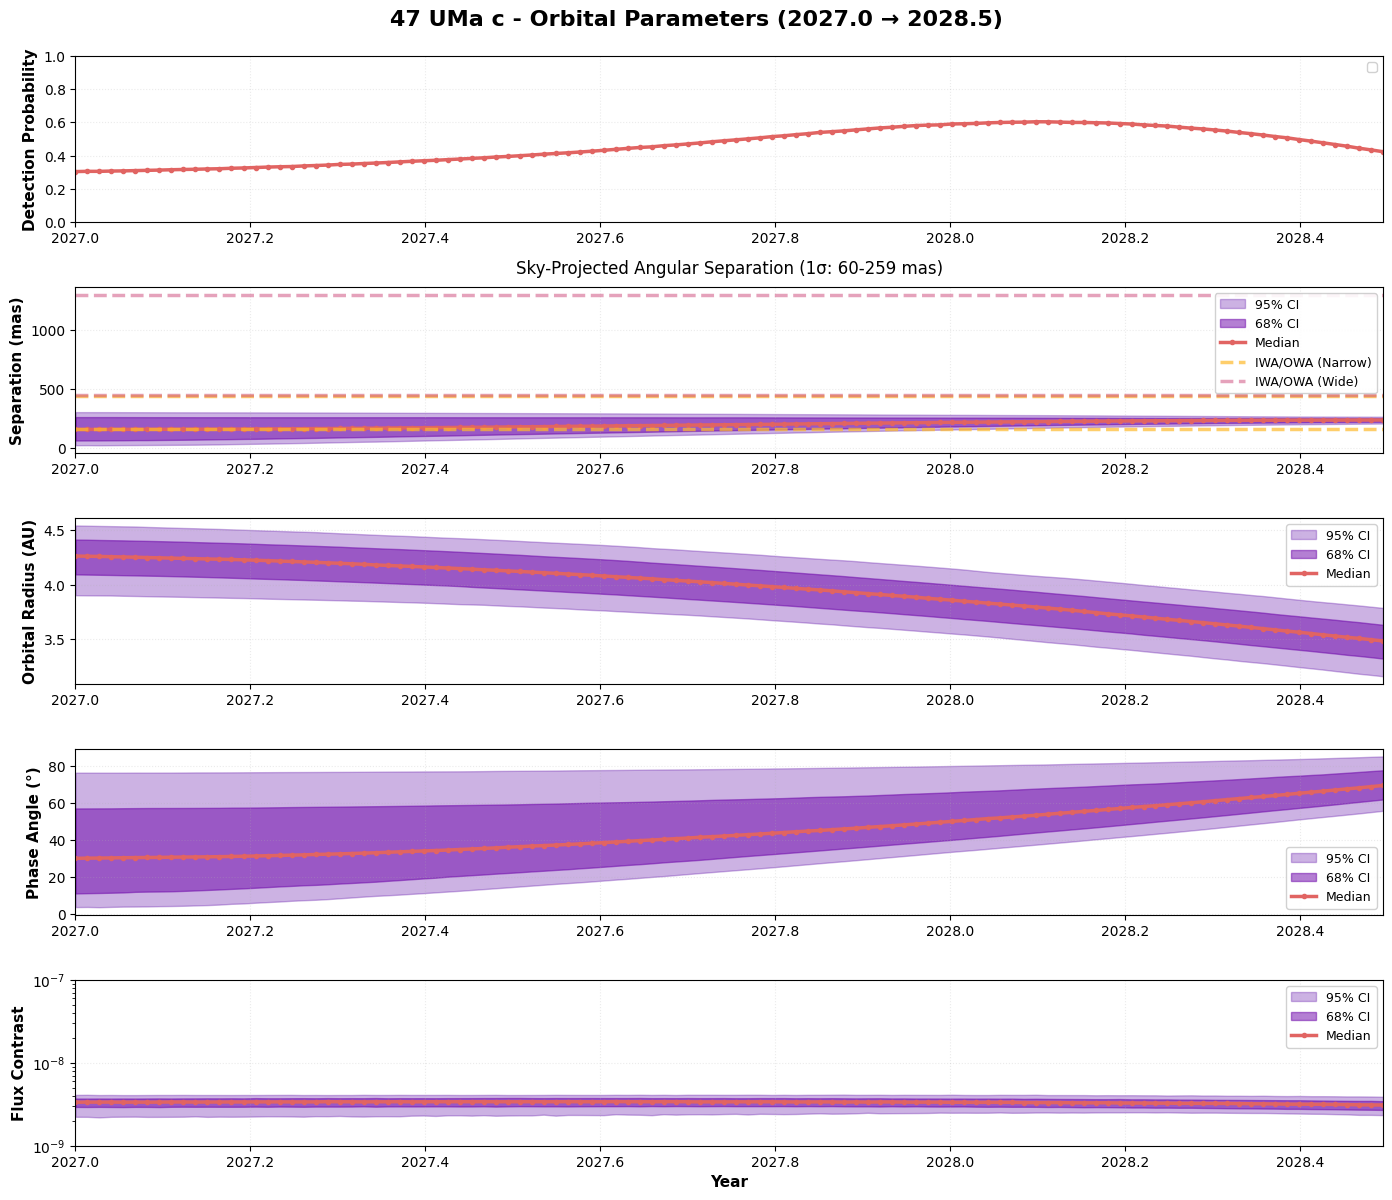